In [88]:
from utils.misc import *
from utils.experiments import *
import numpy as np
import matplotlib.pyplot as plt

In [89]:
def get_baseline(name):
    baseline = {}
    counts = {}
    for i in range(10):
        mc = load_v_history(name+str(i))

        for key in mc[500000].keys():
            if key in baseline.keys():
                baseline[key] += mc[500000][key]
                counts[key] += 1
            else:
                baseline[key] = mc[500000][key]
                counts[key] = 1

    for key in baseline.keys():
        baseline[key] = baseline[key]/counts[key]
    return baseline
print(get_baseline("./fl/mc_fl_"))

{14: 0.9999997999431839, 13: 0.9997496716795368, 9: 0.9995016672758587, 8: 0.9992563814705141, 4: 0.9989945188419714, 0: 0.9989947519813709, 10: 0.9997150997150998, 6: 0.9992248062015504, 2: 0.9992248062015504, 1: 0.9992248062015504}


In [90]:
def get_runs(name,baseline):
    hist = []
    for i in range(10):
        v = load_v_history(name+str(i))
        hist.append(v)

    data = evaluate_experiment(hist, baseline)
    return np.array(data)

In [96]:
def make_plots(names,labels,title,baseline):
    fl = np.zeros((len(names),10,2,500))
    for i,name in enumerate(names):
        fl[i,:,:,:] = get_runs(name,baseline)

    mean = np.mean(fl, axis = 1)
    std = np.std(fl, axis = 1)
    std.shape

    fs = 18
    fig, ax1 = plt.subplots(figsize = (15,10))
    for i in range(std.shape[0]):

        line = ax1.plot(mean[i,0,:], mean[i,1,:],label = labels[i])
        ax1.fill_between(mean[i,0,:], mean[i,1,:], mean[i,1,:] + std[i,1,:],alpha = 0.4, facecolor= line[0].get_color())
        ax1.fill_between(mean[i,0,:], mean[i,1,:], mean[i,1,:] - std[i,1,:], alpha = 0.4, facecolor= line[0].get_color())

    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes, fontsize=fs)
    for tick in ax1.xaxis.get_major_ticks():
              tick.label.set_fontsize(fs-2) 

    for tick in ax1.yaxis.get_major_ticks():
              tick.label.set_fontsize(fs-2)

    ax1.set_xlabel("Number of Episodes", fontsize = fs)
    ax1.set_ylabel("RMS", fontsize = fs)

    fig.suptitle(title, fontsize = fs+6)
    ax1.grid()
    plt.savefig(title+".png")
    plt.show()

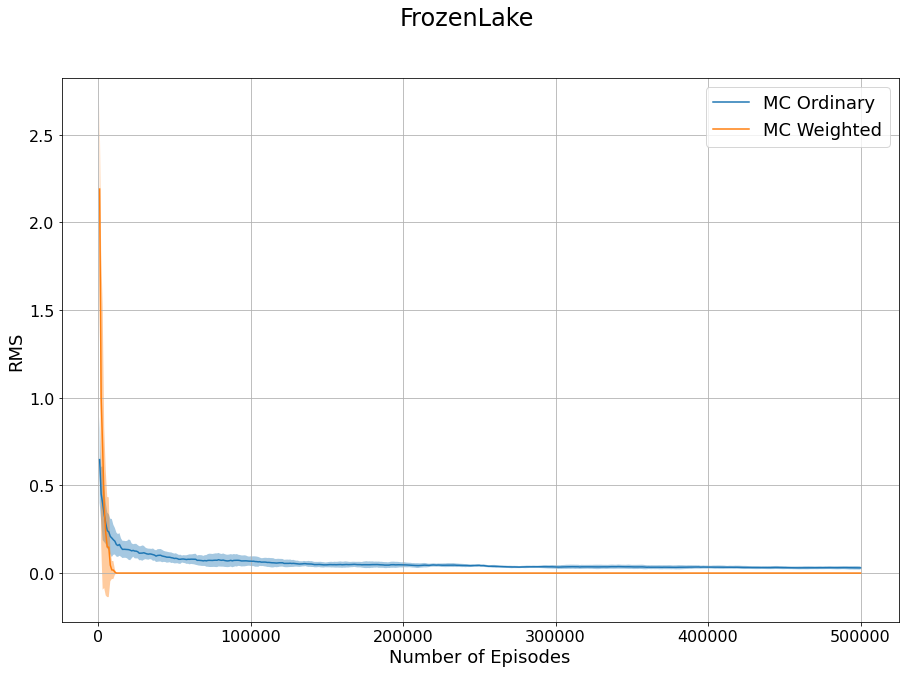

In [97]:
names = ["./fl/mc_ordinary_fl_", "./fl/mc_weighted_fl_"]
labels = ["MC Ordinary", "MC Weighted"]
title = "FrozenLake"
make_plots(names,labels,title, baseline)

In [ ]:
names = ["./bj/mc_ordinary_bj_", "./bj/mc_weighted_bj_","./bj/td_bj_"]
labels = ["MC Ordinary", "MC Weighted", "TD"]
title = "Blackjack"

make_plots(names,labels,title, get_baseline("./bj/mc_bj_"))

In [ ]:
names = ["./nchain/mc_ordinary_nchain_", "./nchain/mc_weighted_nchain_","./nchain/td_nchain_"]
labels = ["MC Ordinary", "MC Weighted", "TD"]
title = "NChain"

make_plots(names,labels,title, get_baseline("./nchain/mc_nchain_"))